<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Belén Rodríguez Llorente***</span></center></font>

## Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi
import matplotlib.pyplot as plt
import scipy as sp
import math
import scipy.stats as stats
from scipy.stats import norm,t,chisquare

<font size="6"><center><span style="color:blue">***Práctica 0: Generadores de números pseudoaleatorios***</span></center></font>

## 1. Método congruencial


Considerad los siguientes valores para los parámetros en el método congruencial:  
* m=2**(31)-1
* a=16807
* b=0  

y la semilla inicial en todos los casos será:  
* x0=123456789

In [ ]:
def congru(x0):
    m=2**(31)-1
    a=16807
    b=0
    x=(a*x0+b)%m
    x_u=x/m
    return(x,x_u)

1. Para comprobar que está correctamente programado, generar 100 valores U(0,1). Éstos deben cumplir:  

    * $\overline{x} = 0.47682692$
    * $S^2_n = 0.09155876$
    * $S^2_{n-1} = 0.09248360$
    * $u1 = 0.2184183 ~ u2 = 0.95631758 ~ u3 = 0.82950923 . . .$  
    

2. Justificar que los números generados proceden de una distribución U(0,1).

In [ ]:
d = 100
x0 = 123456789
x_u = np.zeros(d)
for k in range(d):
    x0, x_u[k] = congru(x0)


#Media
media = np.mean(x_u)
varianzaXn = np.var(x_u, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x_u[0],x_u[1],x_u[2]))

Media 0.4768269202191508
Varianza 0.09248359747373669
u1= 0.21841830 u2= 0.95631758 u3= 0.82950923 ...


## 2. Box-Müller


In [ ]:
def BoxMuller(x0):
    x0,u1=congru(x0)
    x0,u2=congru(x0)
    x=sqrt(-2*log(u1))*cos(2*pi*u2)
    y=sqrt(-2*log(u1))*sin(2*pi*u2)

    return x,y,x0

1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.02737136$
    * $S^2_n = 1.079609$
    * $S^2_{n-1} = 1.090514$
    * $u1 = 1.679040257 ~ u2 = −0.566059812 ~ u3 = 1.212934217 . . .$
    * $\overline{y} = −0.1220177$
    * $S^2_n = 1.040119$
    * $S^2_{n-1} = 1.050626$
    * $u1 = −0.47276880 ~ u2 = −0.23112413 ~ u3 = 0.53503714 . . .$  
    

2. Justificar que los números generados proceden de una distribución N(0,1).

In [ ]:
x0 = 123456789
mu = 0
sigma = 1
d = 100
x = np.zeros(d)
y = np.zeros(d)

for i in range(d):
    x[i],y[i],x0 = BoxMuller(x0)


#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.027371357960748598
Varianza x 1.0905141204763558
Media sin -0.12201765379519719
Varianza y 1.0506256886858798
u1= 1.67904026 u2= -0.56605981 u3= 1.21293422 ...
u1= -0.47276880 u2= -0.23112413 u3= 0.53503714 ...


## 3. Método Marsaglia


In [ ]:
def Marsaglia(x0):
    while True:
        x01, u1 = congru(x0)
        x0, u2 = congru(x01)
        v1 = 2*u1-1
        v2 = 2*u2-1
        R2 = v1**2 + v2**2
        if R2<=1:
            y = sqrt((-2*log(R2))/R2)
            x1 = v1*y
            x2 = v2*y
            return(x1,x2,x0)

1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.2159052$
    * $S^2_n = 0.7075141$
    * $S^2_{n-1} = 0.7146607$
    * $u1 = 1.24295692 ~ u2 = −0.13445768 ~ u3 = −0.30786186 . . .$
    * $\overline{y} = −0.1732801$
    * $S^2_n = 0.9229105$
    * $S^2_{n-1} = 0.9322328$
    * $u1 = 0.23272421 ~ u2 = −0.68882581 ~ u3 = −0.49533179 . . .$
    
    
2. Justificar que los números generados proceden de una distribución N(0,1).


In [ ]:
x0 = 123456789
d = 100
x = np.zeros(d)
y = np.zeros(d)
for i in range(d):
    x[i],y[i],x0 = Marsaglia(x0)

#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.215905222427565
Varianza x 0.7146606838685954
Media sin -0.17328006153554742
Varianza y 0.932232837378258
u1= 1.24295692 u2= -0.13445768 u3= -0.30786186 ...
u1= 0.23272421 u2= -0.68882581 u3= -0.49533180 ...


## 2. Box-Müller antitéticas

In [ ]:
def boxmuller_anti(mu,sigma,x0,a,b,m):

    x0,u_1=congru(x0,a,b,m)
    x0,u_2=congru(x0,a,b,m)

    x=sqrt(-2*log(1-u_1))*cos(2*pi*(1-u_2))
    y=sqrt(-2*log(1-u_1))*sin(2*pi*(1-u_2))

    x=sigma*x + mu
    y=sigma*y + mu

    return(x0,x,y)

## 2. Marsaglia antitéticas

In [ ]:
def marsaglia_anti(mu,sigma,x0,a,b,m):
    Rcuad=2;

    while Rcuad > 1:
        x0,u1=congru(x0, a ,b, m)
        x0,u2=congru(x0, a ,b, m)
        v1=2*(1-u1)-1
        v2=2*(1-u2)-1
        Rcuad=v1**2+v2**2

    y=sqrt(-2*log(Rcuad)/Rcuad);
    x1=v1*y;
    x2=v2*y;

    return(x0,x1,x2)

## 4. t-Student


In [ ]:
def Gamma(p,a,x0):
    u = np.zeros(p)
    suma = 0
    for i in range(p):
        x0, v = congru(x0)
        u[i] = log(v)

    x = -sum(u)/a
    return(x,x0)

def chi_cuadrado(n,x0):
    if n%2==0:
        X,x0 = Gamma(int(n/2),1/2,x0)
        return(X,x0)
    else:
        x,x0 = Gamma(int((n-1))/2,1/2,x0)
        y,Z,x0 = BoxMuller(x0)
        X = x + Z**2
        return(X,x0)

def t_Student(n,x0):
    x,Z,x0 = BoxMuller(x0)
    Y,x0 = chi_cuadrado(n,x0)
    X = Z/sqrt(Y/n)
    return(X,x0)

Para comprobar que está correctamente programado, generar 100 valores de la variable aleatoria $t_{10}$.
Éstos deben cumplir:
* $\overline{x} = −0.00024283$
* $S^2_n = 1.515859$
* $S^2_{n-1} = 1.531171$
* $u1 = −0.442199721 ~ u2 = 0.558411054 ~ u3 = 0.006160887 . . .$


In [ ]:
d = 100
n = 10
x0 = 123456789
x = np.zeros(d)
for i in range(d):
    x[i],x0 = t_Student(n,x0)


#Media
media = np.mean(x)
varianzaXn = np.var(x, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))

Media -0.00024282921630347954
Varianza 1.5311711734970987
u1= -0.44219972 u2= 0.55841105 u3= 0.00616089 ...


<font size="6"><center><span style="color:blue">***Práctica 1***</span></center></font>

1. Generar un movimiento browniano unidimensional para T=100 con ∆𝑡=1 según la expresión:

<font size="3"><center>$X \leftarrow X + \sqrt{\Delta t } Z$ donde $Z \sim \mathcal{N}(0,1)$</center></font>

2. Generar 4 movimientos brownianos usando los valores de la distribución Normal generados mediante el seno y coseno del método de Box-Müller y también con variables antitéticas.

3. Generar 4 movimientos brownianos usando los valores de la ditribución normal generados mediante el método de Marsaglia y también con variables antitéticas.

<font size="2">*Nota: Reiniciar la semilla cada vez que se use un método nuevo.
Representar gráficamente las ocho trayectorias obtenidas. Verificar con estas imágenes:*</font>

<div class="pull-left"><img src="4movBM.png" style="height: 300px"></div>
<img src="4movMG.png" style="height: 300px">

4. Representar graficamente 1 movimiento browniano bidimensional.

<font size="6"><center><span style="color:blue">***Práctica 2***</span></center></font>

<font size="4" color=blue>**Apartado a**</font>
***

Obtener los valores de una opción call y una opción put europeas con vencimiento $T$. Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}} [\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(a.1.)** Obtener el valor de una opción call usando la fórmula de Black-Scholes:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$

**Datos:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$

<font size="2">**Nota:** La varianza de la estimación del valor es $S^2_{\mathrm{call}} = (e^{-r_c t})^2 S^2_{\mathrm{\overline{payoff}}}$.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>



<font size="4" color=blue>**Apartado b**</font>
***
Obtener los valores de una opción call y una opción put europeas con vencimiento $T = 1$ (con los mismos datos del apartado anterior). Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(b.1.)** Obtener el valor final del subyacente mediante la expresión en el plazo final:  

$$
S(t) = S(0) e^{(r_c - d_c - 0.5\sigma^2)t + \sigma \sqrt{t}\mathcal{N}(0,1)}.
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.919841;Varianza=10.065818;Precisión=0.196879$.</font>
    
- **(b.2.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y la expresión (Lema de Itô):  

$$
S \leftarrow S e^{(r_c - d_c - 0.5\sigma^2)\Delta t + \sigma \sqrt{\Delta t}\mathcal{N}(0,1)}.
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.008849;Varianza=10.349455;Precisión=0.199633$.</font>
    
- **(b.3.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y el mecanismo de transición. (Ecuación estocástica)  

$$
S \leftarrow S + S(r_{\Delta t} - d_{\Delta t})+\sigma S \sqrt{\Delta t}\mathcal{N}(0,1) = S(1+r-d)^{\Delta t} + \sigma S \sqrt{\Delta t} \mathcal{N}(0,1)
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.005745;Varianza=10.020386;Precisión=0.196434$.</font>
    
- **(b.4.)** Usando el valor final del subyacente mediante la expresión en el plazo final, determinar el tamaño muestral para que la estimación sea de un céntimo de Euro.

<font size="2" color=grey>**Nota para comprobación:** $t=1;n \approx 388mil$.</font>

<font size="6"><center><span style="color:blue">***Práctica 3***</span></center></font>

Obtener mediante simulación el valor de una opción call europea vainilla con dividendos para plazos t=1,2,...,T, pero cuyos incrementos se rigen según una distribución t-Student. Dar la estimación del valor y la precisión y comparar con el resultado de la práctica anterior. Utilizar los mismos datos que en la práctica anterior y n=6. Utilizar para la evolución del subyacente:

$$
S \leftarrow S e^{(r_c - d_c)\Delta t} + \sigma S \sqrt{\Delta t}\frac{t_n}{\sqrt{n/(n-2)}}
$$

<font size="2">**Nota:** Recordar que la varianza de una t-Student con n grados de libertad es $\frac{n}{n-2}$, con lo que al sustituir la Normal por la t-Student, ha de hacerse con ésta tipificada.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.840173;Varianza=8.169188;Precisión=0.177363$.</font>

<font size="6"><center><span style="color:blue">***Práctica 4***</span></center></font>

<font size="4" color=blue>**Apartado a**</font>
***
Se trata de ver la influencia que tienen los parámetros en el valor de la opción, de acuerdo a la fórmula de Black-Scholes, de una forma intuitiva basada en revisar el cambio del valor de la opción cuando cambian los parámetros a través de una rejilla de valores. En la mayoría de los casos, se puede ver una cuantificación más exacta de forma analítica utilizando la derivada parcial del valor de la opción con respecto a la variable que estamos examinando.

Teniendo en cuenta la fórmula de Black-Scholes para valoración de opciones:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$
***
**Recordatorio datos utilizados anteriormente:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>
***
Se trata de realizar una tabla en la que por filas se realicen modificaciones del valor del strike $K$, por ejemplo para valores 12, 13, 14, 15, 16 y por columnas de la tasa de interés $r$, por ejemplo valores 0.01, 0.02, 0.03, 0.04, 0.05 y el contenido de la celda se corresponda con el valor de la opción. Mostrar 2 tablas, la primera para T=0.5 y la segunda para T=1. Ejemplo de estilo de tabla:

<center><strong>Valores de distintas opciones de compra Call</strong></center>
   
|   |   |   | **r** |    |   |
|--------------|--------------|--------------|--------------|--------------|--------------|
| **k**    | **0.01**    | **0.02**    | **0.03**    | **0.04**    | **0.05**    |
| **12**    | ......    | ......    | ......    | ......    | ......    |
| **13**    | ......    | ......    | ......    | ......    | ......    |
| **14**    | ......    | ......    |1.856787| ......    | ......    |
| **15**    | ......    | ......    | ......    | ......    | ......    |
| **16**    | ......    | ......    | ......    | ......    | ......    |




Se pide analizar y comentar los siguientes casos:

- **(a.1.) Modificaciones en el tiempo T hasta la fecha de ejercicio.**
- **(a.2.) Modificaciones en la tasa de interés r.**
- **(a.3.) Modificaciones en el precio de ejercicio K.**

Añadir las tablas que consideréis para poder analizar:

- **(a.4.) Cambios en la volatilidad $\sigma$.**



<font size="4" color=blue>**Apartado b**</font>
***
Obtener mediante simulación el valor de una opción call asiática browniana con dividendos y vencimiento T. Dar la estimación del valor y la precisión. Utilizar los mismos datos que en la práctica anterior y comparar el resultado con los resultados obtenidos en esa práctica.

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.213168;Varianza=3.244590;Precisión=0.111778$.</font>

<font size="6"><center><span style="color:blue">***Práctica 5***</span></center></font>

- **(b.)** Obtener mediante simulación el valor de una estrategia **butterfly** formada por la compra de una opción call europea con strike $K$, la compra de otra opción europea con strike $K'>K$ y la venta de dos opciones call europeas con strike $K''$ tal que $K<K''<K'$, todas sobre el mismo subyacente.  
Aplicarlo suponiendo los datos de las prácticas anteriores con $K = 14, K' = 16$ y $K'' = 15$.

- **(a.)** Teniendo en cuenta las consideraciones anteriores y dependiendo del resultado del subyacente define y muestra la tabla de payoffs antes de desarrollar el código.  

- **(c.)** Grafica el resultado y comprueba que el gráfico tiene la misma forma que lo ya visto en la parte de teoría.

- **(d.)** Muestra graficamente cual sería el beneficio obtenido, es decir, considerando el coste de la prima.

- **(e.)** Los mismos apartados anteriores para una estrategia **strangle** (tipo cuna, forma parte de la especulativas) formada por la compra de una opción call europea con strike $K'$ y una opción put con strike $K$, con $K'>K$.

In [ ]:
# Datos
r = 0.03  # Tasa libre de riesgo
K = 14  # Strike price
T_values = [1, 2, 3]  # Tiempos al vencimiento
sigma = 0.3  # Volatilidad
S0 = 14  # Precio inicial del subyacente
d = 0  # Tasa de dividendos

rc=math.log(1+r) # tasa de interés en tiempo continuo
dc=math.log(1+d)

delta = 1 / 12  # Paso temporal: 1 mes
alpha = 0.05  # Nivel de confianza (95%)
N = 1000  # Número de simulaciones
x0 = 123456789  # Semilla inicial

### Apartado a

In [ ]:
# Parámetros de la estrategia
K1 = 14  # Strike de la primera call
K2 = 15  # Strike de las calls vendidas
K3 = 16  # Strike de la segunda call

# Crear tabla de resultados para condiciones
conditions = ["S < K1", "K1 <= S < K2", "K2 <= S < K3", "S >= K3"]

# Definir los resultados en cada región del subyacente
results = []
for condition in conditions:
    if condition == "S < K1":
        results.append({
            "Condición": condition,
            "Compra Call K1": 0,
            "Venta 2 Call K2": 0,
            "Compra Call K3": 0,
            "Butterfly": 0
        })
    elif condition == "K1 <= S < K2":
        results.append({
            "Condición": condition,
            "Compra Call K1": "S - K1",
            "Venta 2 Call K2": 0,
            "Compra Call K3": 0,
            "Butterfly": "S - K1"
        })
    elif condition == "K2 <= S < K3":
        results.append({
            "Condición": condition,
            "Compra Call K1": "S - K1",
            "Venta 2 Call K2": "-2(S - K2)",
            "Compra Call K3": 0,
            "Butterfly": "-S - K1 + 2 K2"
        })
    elif condition == "S >= K3":
        results.append({
            "Condición": condition,
            "Compra Call K1": "S - K1",
            "Venta 2 Call K2": "-2(S - K2)",
            "Compra Call K3": "S - K3",
            "Butterfly": " - K1 + 2 K2 - K3"
        })

# Crear DataFrame
payoff_table = pd.DataFrame(results)

# Mostrar la tabla
print("\nTabla de Payoffs Butterfly:")
print(payoff_table.to_string(index=False))


Tabla de Payoffs Butterfly:
   Condición Compra Call K1 Venta 2 Call K2 Compra Call K3         Butterfly
      S < K1              0               0              0                 0
K1 <= S < K2         S - K1               0              0            S - K1
K2 <= S < K3         S - K1      -2(S - K2)              0    -S - K1 + 2 K2
     S >= K3         S - K1      -2(S - K2)         S - K3  - K1 + 2 K2 - K3


Hagamos un ejemplo para datos concretos de S, de manera que podemas calcular todos lso valores de al tabla numéricamente:


Tabla de Payoffs Butterfly:
   S  Compra Call K1  Venta 2 Call K2  Compra Call K3  Butterfly
13.0             0.0              0.0             0.0        0.0
14.5             0.5             -0.0             0.0        0.5
15.5             1.5             -1.0             0.0        0.5
17.0             3.0             -4.0             1.0        0.0


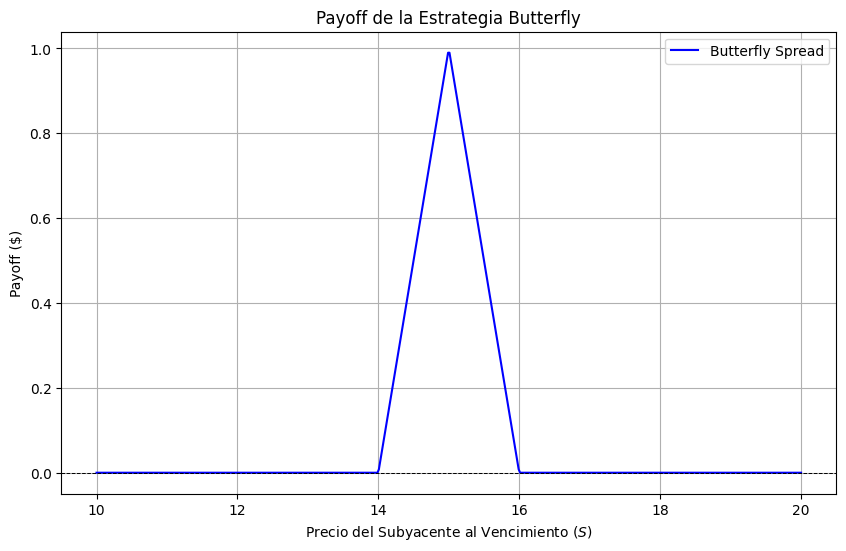

In [ ]:
# Crear funciones para los payoffs
def payoff_call_k1(S):
    return np.maximum(S - K1, 0)

def payoff_call_k2(S):
    return 2 * np.maximum(S - K2, 0)

def payoff_call_k3(S):
    return np.maximum(S - K3, 0)

def payoff_butterfly(S):
    return payoff_call_k1(S) - payoff_call_k2(S) + payoff_call_k3(S)

# Calcular payoffs para distintas regiones de S
S_values = [13,14.5,15.5,17]
data = []

for S in S_values:
    data.append([
        S,
        payoff_call_k1(S),
        -payoff_call_k2(S),
        payoff_call_k3(S),
        payoff_butterfly(S)
    ])

# Crear tabla con pandas
table = pd.DataFrame(data, columns=["S", "Compra Call K1", "Venta 2 Call K2", "Compra Call K3", "Butterfly"])

# Mostrar la tabla formateada
print("\nTabla de Payoffs Butterfly:")
print(table.to_string(index=False))

# Graficar el payoff
S = np.linspace(10, 20, 500)
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_butterfly(S), label='Butterfly Spread', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Payoff de la Estrategia Butterfly')
plt.xlabel('Precio del Subyacente al Vencimiento ($S$)')
plt.ylabel('Payoff ($)')
plt.legend()
plt.grid()
plt.show()


### Apartado b

In [ ]:
# Simulamos para T = 1, 2, 3
x0=123456789
resultados = []
for T in [1, 2, 3]:
    # Generar valores normales con Box-Muller
    Z = []
    for _ in range(N):
        z1, z2, x0 = BoxMuller(x0)
        Z.append(z2)  # Tomamos solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular payoffs de la estrategia butterfly
    payoffs = payoff_butterfly(ST)

    # Calcular el valor presente esperado de la estrategia
    valor_butterfly = np.exp(-rc * T) * np.mean(payoffs)
    resultados.append((T, valor_butterfly))

    # Mostrar resultados para este T
    print(f"Valor esperado de la estrategia Butterfly para T = {T}: {valor_butterfly:.7f}")


Valor esperado de la estrategia Butterfly para T = 1: 0.0886853
Valor esperado de la estrategia Butterfly para T = 2: 0.0702275
Valor esperado de la estrategia Butterfly para T = 3: 0.0453955


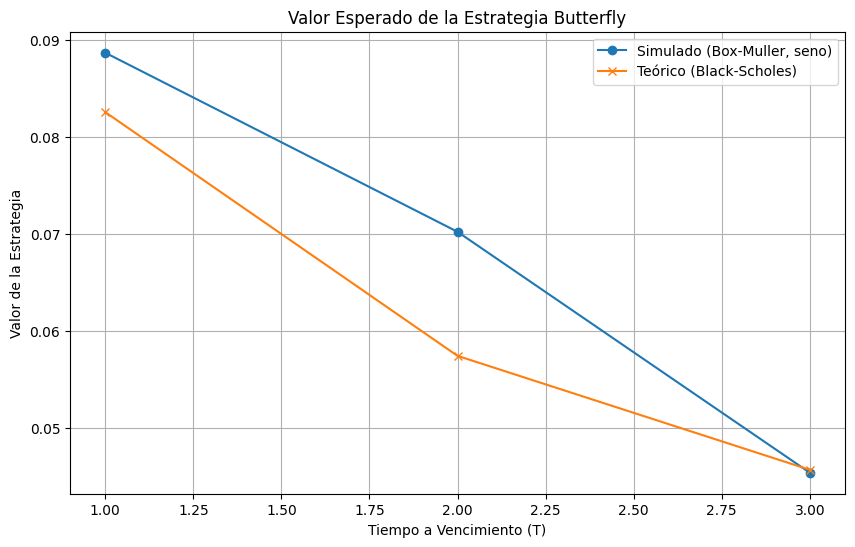

In [ ]:
def black_scholes_call(S, K, r, sigma, d, T):
    d1 = (math.log(S / K) + (math.log(1 + r) - math.log(1 + d) + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    precio_call = S * math.exp(-math.log(1 + d) * T) * norm.cdf(d1) - K * math.exp(-math.log(1 + r) * T) * norm.cdf(d2)
    return precio_call

# Resultados de simulaciones
resultados_simulados = [valor[1] for valor in resultados]
resultados_teoricos = []
T_values = [1, 2, 3]  # Vencimientos


# Valor teórico con Black-Scholes
for T in T_values:
    # Valor teórico con Black-Scholes (para precio medio)
    precio_call_1 = black_scholes_call(S0, K1, r, sigma, d, T)
    precio_call_2 = black_scholes_call(S0, K2, r, sigma, d, T)
    precio_call_3 = black_scholes_call(S0, K3, r, sigma, d, T)
    valor_teorico = precio_call_1 - 2 * precio_call_2 + precio_call_3
    resultados_teoricos.append(valor_teorico)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(T_values, resultados_simulados, label="Simulado (Box-Muller, seno)", marker='o')
plt.plot(T_values, resultados_teoricos, label="Teórico (Black-Scholes)", marker='x')
plt.title("Valor Esperado de la Estrategia Butterfly")
plt.xlabel("Tiempo a Vencimiento (T)")
plt.ylabel("Valor de la Estrategia")
plt.legend()
plt.grid()
plt.show()

### Apartado c

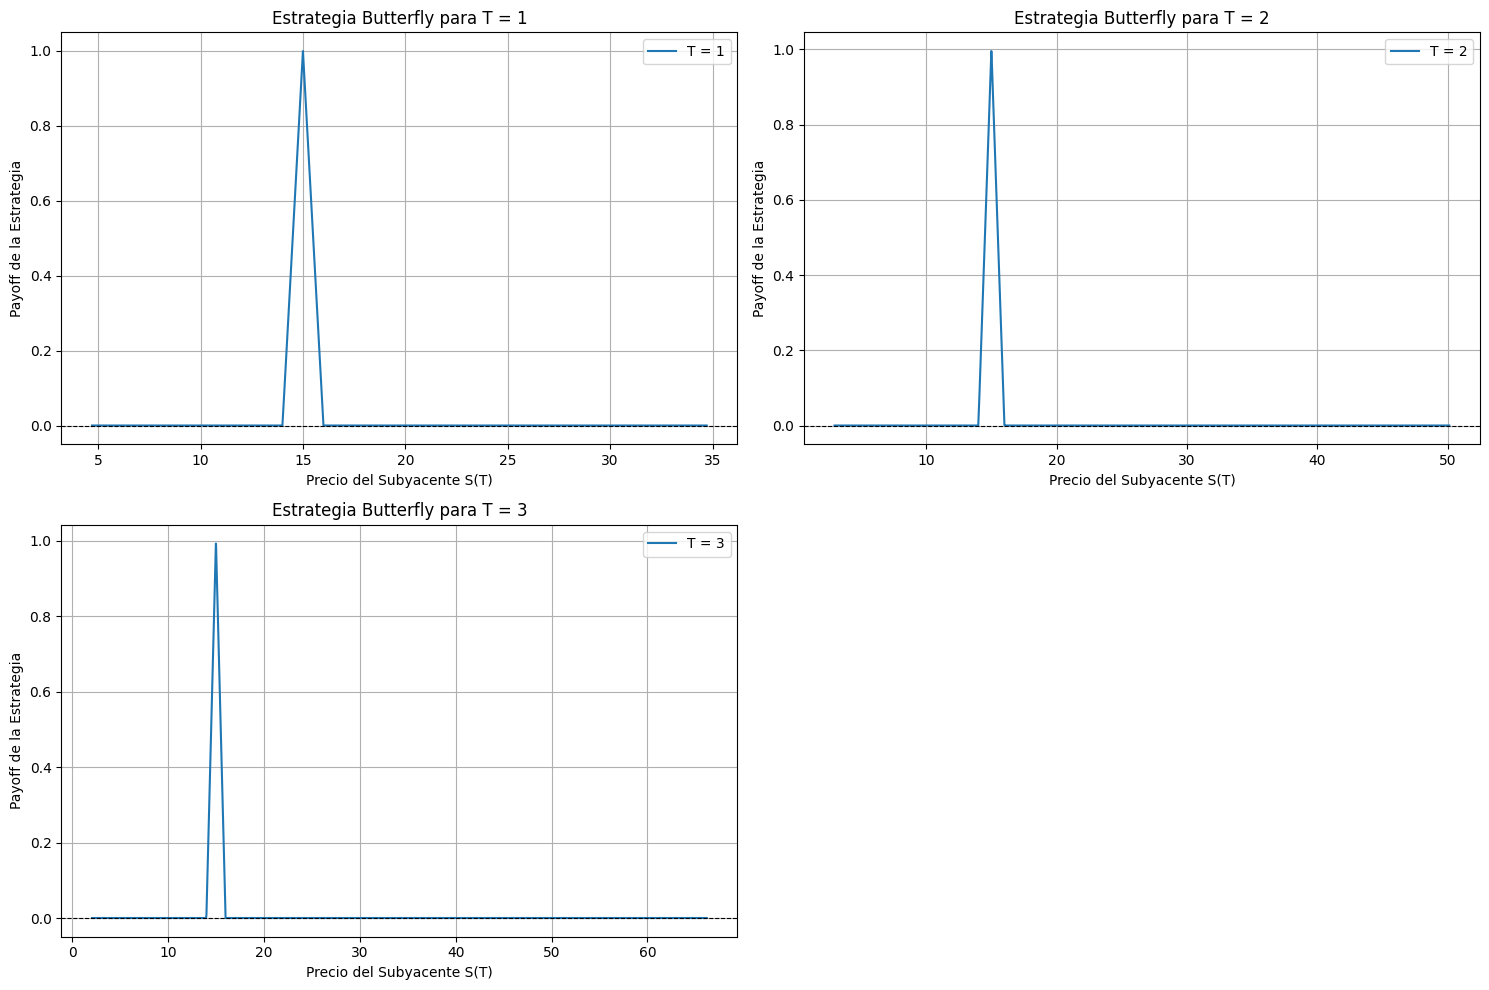

In [ ]:
# Generar gráficos para cada T
plt.figure(figsize=(15, 10))

for i, T in enumerate(T_values, 1):
    # Generar valores normales con Box-Muller
    Z = []
    seed_local = x0  # Usar una semilla inicial para cada T
    for _ in range(N):
        z1, z2, seed_local = BoxMuller(seed_local)
        Z.append(z2)  # Usar solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular payoffs de la estrategia butterfly
    payoffs = payoff_butterfly(ST)

    # Ordenar valores para una gráfica suave
    sorted_indices = np.argsort(ST)
    ST_sorted = ST[sorted_indices]
    payoffs_sorted = payoffs[sorted_indices]

    # Crear un subplot para este T
    plt.subplot(2, 2, i)
    plt.plot(ST_sorted, payoffs_sorted, label=f"T = {T}")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Línea en y=0
    plt.title(f"Estrategia Butterfly para T = {T}")
    plt.xlabel("Precio del Subyacente S(T)")
    plt.ylabel("Payoff de la Estrategia")
    plt.legend()
    plt.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()

### Apartado d

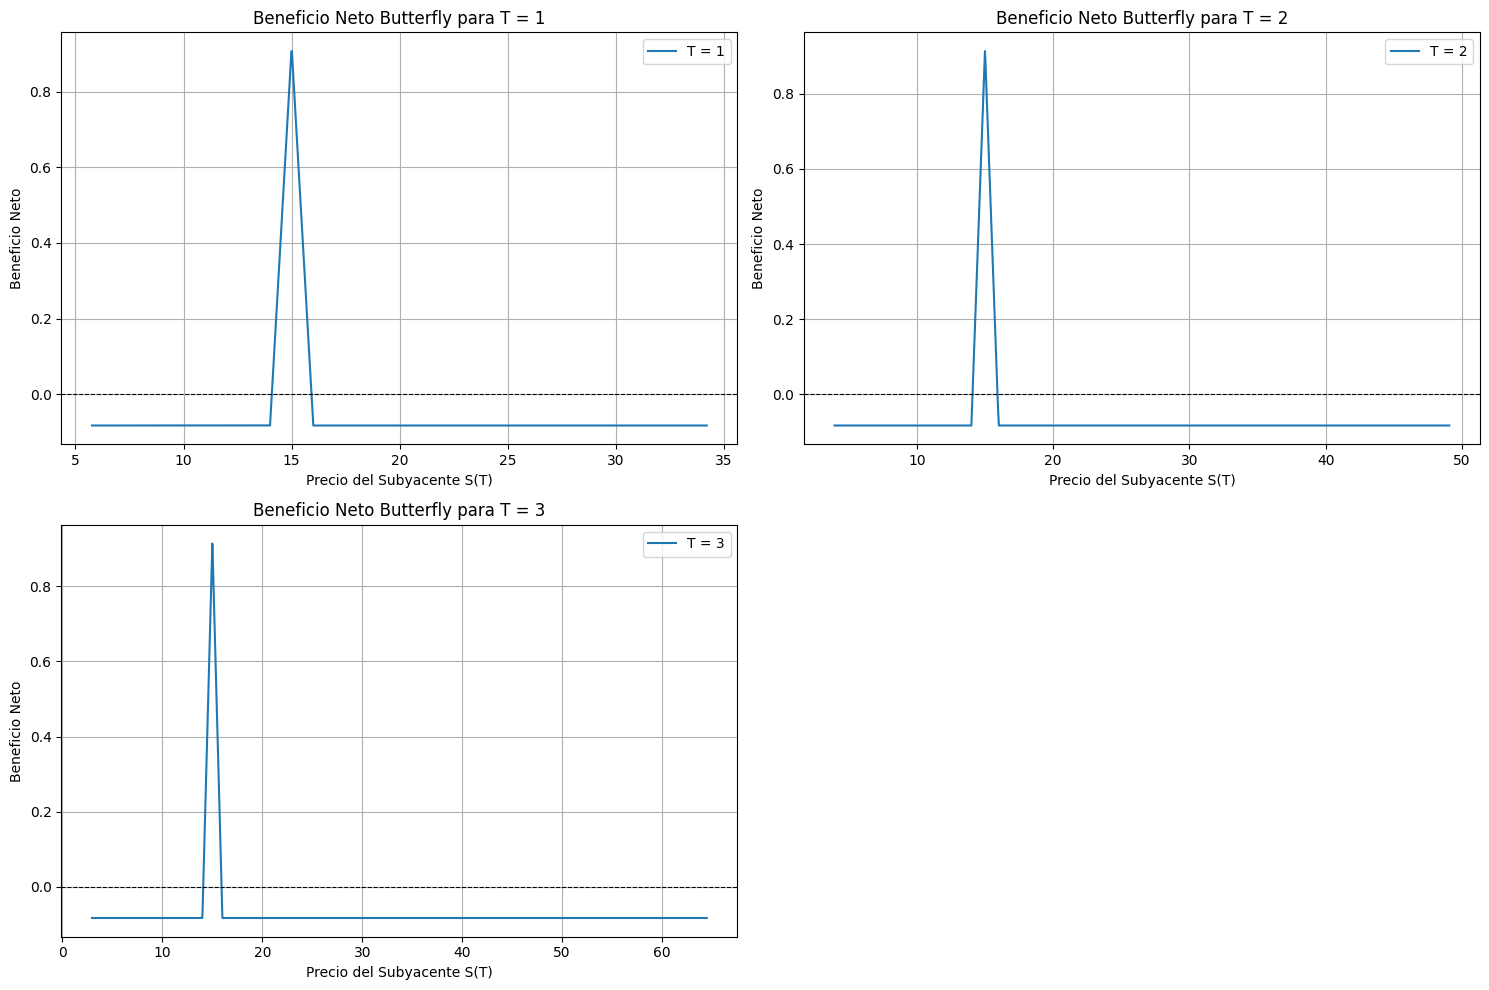

In [ ]:
# Calcular el costo de la estrategia butterfly (costo inicial)
cost_call_K1 = black_scholes_call(S0, K1, r, sigma, d, 1)
cost_call_K2 = black_scholes_call(S0, K2, r, sigma, d, 1)
cost_call_K3 = black_scholes_call(S0, K3, r, sigma, d, 1)
costo_estrategia = cost_call_K1 - 2 * cost_call_K2 + cost_call_K3

# Generar gráficos para cada T
x0=123456789
plt.figure(figsize=(15, 10))

for i, T in enumerate(T_values, 1):
    # Generar valores normales con Box-Muller
    Z = []
    seed_local = x0  # Usar una semilla inicial para cada T
    for _ in range(N):
        z1, z2, seed_local = BoxMuller(seed_local)
        Z.append(z2)  # Usar solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular payoffs de la estrategia butterfly
    payoffs = payoff_butterfly(ST)

    # Calcular el beneficio neto
    beneficio = payoffs - costo_estrategia

    # Ordenar valores para una gráfica suave
    indices_ordenados = np.argsort(ST)
    ST_ordenado = ST[indices_ordenados]
    beneficio_ordenado = beneficio[indices_ordenados]

    # Crear un subplot para este T
    plt.subplot(2, 2, i)
    plt.plot(ST_ordenado, beneficio_ordenado, label=f"T = {T}")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Línea en y=0
    plt.title(f"Beneficio Neto Butterfly para T = {T}")
    plt.xlabel("Precio del Subyacente S(T)")
    plt.ylabel("Beneficio Neto")
    plt.legend()
    plt.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()

### Apartado e

#### Tablita teórica (equivalente al apartado a)

In [ ]:
# Parámetros de la estrategia
K1 = 14  # Strike del Put
K3 = 16  # Strike del Call

# Crear tabla de resultados para condiciones
conditions = ["S < K1", "K1 <= S < K3", "S >= K3"]

# Definir los resultados en cada región del subyacente
results = []
for condition in conditions:
    if condition == "S < K1":
        results.append({
            "Condición": condition,
            "Payoff Put (Compra, K1)": "K1 - S",
            "Payoff Call (Compra, K3)": "0",
            "Strangle (Suma de Payoffs)": "K1 - S"
        })
    elif condition == "K1 <= S < K3":
        results.append({
            "Condición": condition,
            "Payoff Put (Compra, K1)": "0",
            "Payoff Call (Compra, K3)": "0",
            "Strangle (Suma de Payoffs)": "0"
        })
    elif condition == "S >= K3":
        results.append({
            "Condición": condition,
            "Payoff Put (Compra, K1)": "0",
            "Payoff Call (Compra, K3)": "S - K3",
            "Strangle (Suma de Payoffs)": "S - K3"
        })

# Crear DataFrame
payoff_table = pd.DataFrame(results)

# Mostrar la tabla
print("\nTabla de Payoffs Strangle:")
print(payoff_table.to_string(index=False))


Tabla de Payoffs Strangle:
   Condición Payoff Put (Compra, K1) Payoff Call (Compra, K3) Strangle (Suma de Payoffs)
      S < K1                  K1 - S                        0                     K1 - S
K1 <= S < K3                       0                        0                          0
     S >= K3                       0                   S - K3                     S - K3


#### Equivalencia al apartado b

In [ ]:
# Simular para T = 1, 2, 3
x0=123456789
resultados = []
for T in [1, 2, 3]:
    # Generar valores normales con Box-Muller
    Z = []
    for _ in range(N):
        z1, z2, x0 = BoxMuller(x0)
        Z.append(z2)  # Tomamos solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular los payoffs de la estrategia Strangle
    payoff_put = np.maximum(K1 - ST, 0)  # Payoff de la Put
    payoff_call = np.maximum(ST - K3, 0)  # Payoff de la Call
    payoffs_strangle = payoff_put + payoff_call  # Suma de los payoffs

    # Calcular el valor presente esperado de la estrategia Strangle
    valor_strangle = np.exp(-rc * T) * np.mean(payoffs_strangle)
    resultados.append((T, valor_strangle))

    # Mostrar resultados para este T
    print(f"Valor esperado de la estrategia Strangle para T = {T}: {valor_strangle:.7f}")

Valor esperado de la estrategia Strangle para T = 1: 2.5638923
Valor esperado de la estrategia Strangle para T = 2: 3.9916799
Valor esperado de la estrategia Strangle para T = 3: 4.7443655


#### Equivalencia al apartado c

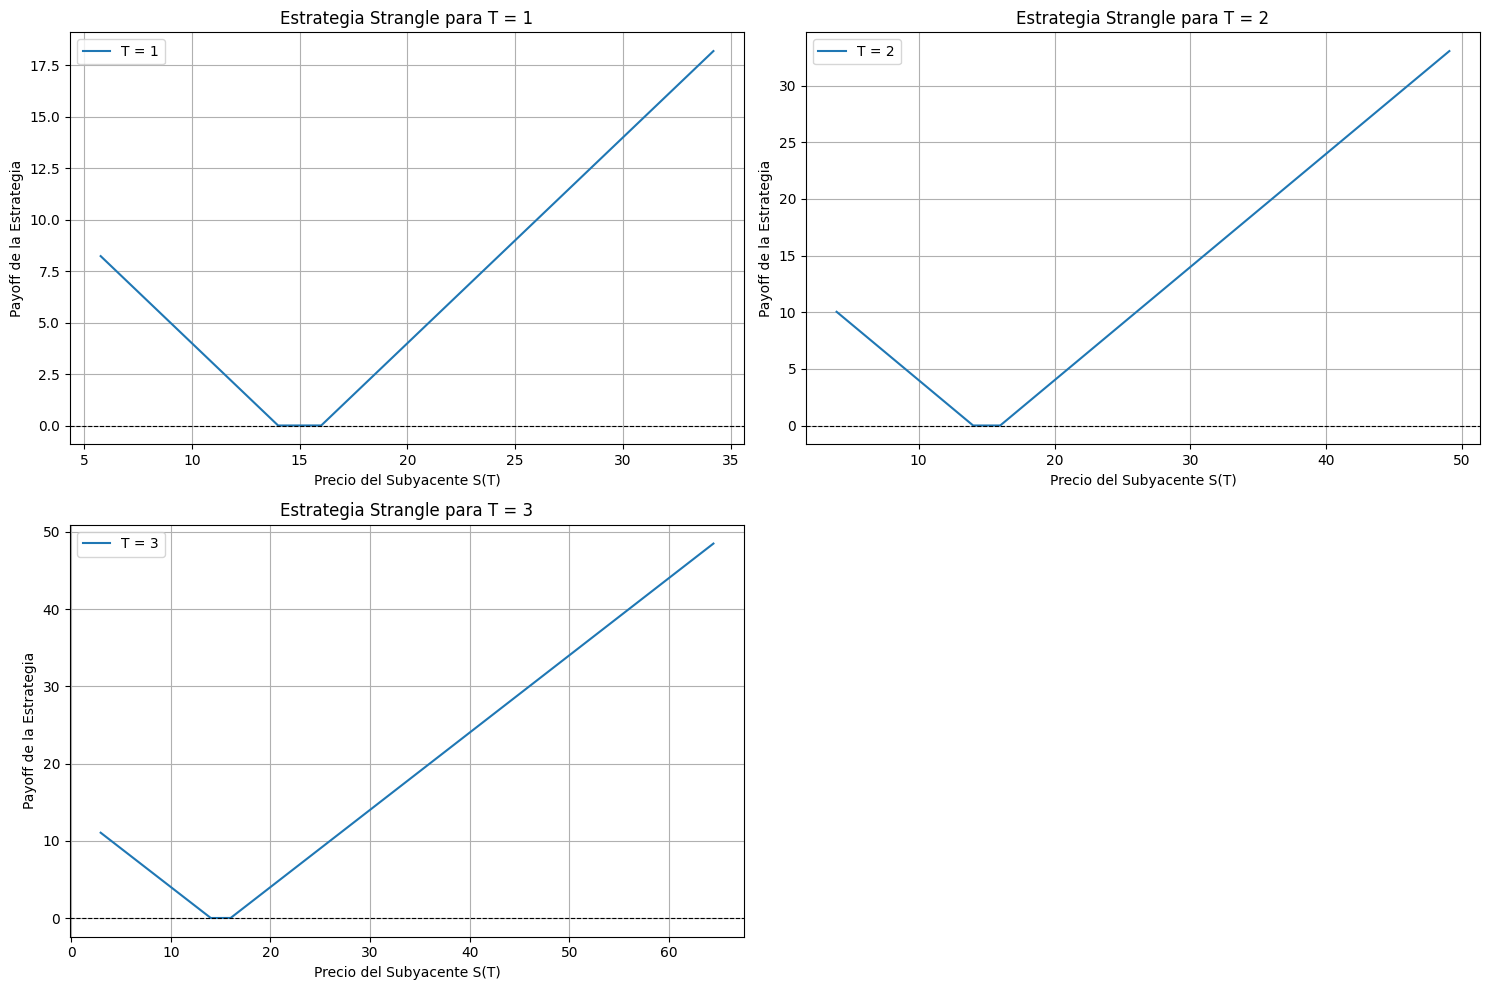

In [ ]:
# Generar gráficos para cada T
plt.figure(figsize=(15, 10))
x0=123456789

for i, T in enumerate(T_values, 1):
    # Generar valores normales con Box-Muller
    Z = []
    seed_local = x0  # Usar una semilla inicial para cada T
    for _ in range(N):
        z1, z2, seed_local = BoxMuller(seed_local)
        Z.append(z2)  # Usar solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular los payoffs de la estrategia Strangle
    payoff_put = np.maximum(K1 - ST, 0)  # Payoff de la Put
    payoff_call = np.maximum(ST - K3, 0)  # Payoff de la Call
    payoffs_strangle = payoff_put + payoff_call  # Suma de los payoffs

    # Ordenar valores para una gráfica suave
    sorted_indices = np.argsort(ST)
    ST_sorted = ST[sorted_indices]
    payoffs_sorted = payoffs_strangle[sorted_indices]

    # Crear un subplot para este T
    plt.subplot(2, 2, i)
    plt.plot(ST_sorted, payoffs_sorted, label=f"T = {T}")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Línea en y=0
    plt.title(f"Estrategia Strangle para T = {T}")
    plt.xlabel("Precio del Subyacente S(T)")
    plt.ylabel("Payoff de la Estrategia")
    plt.legend()
    plt.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()

#### Equivalencia al apartado d

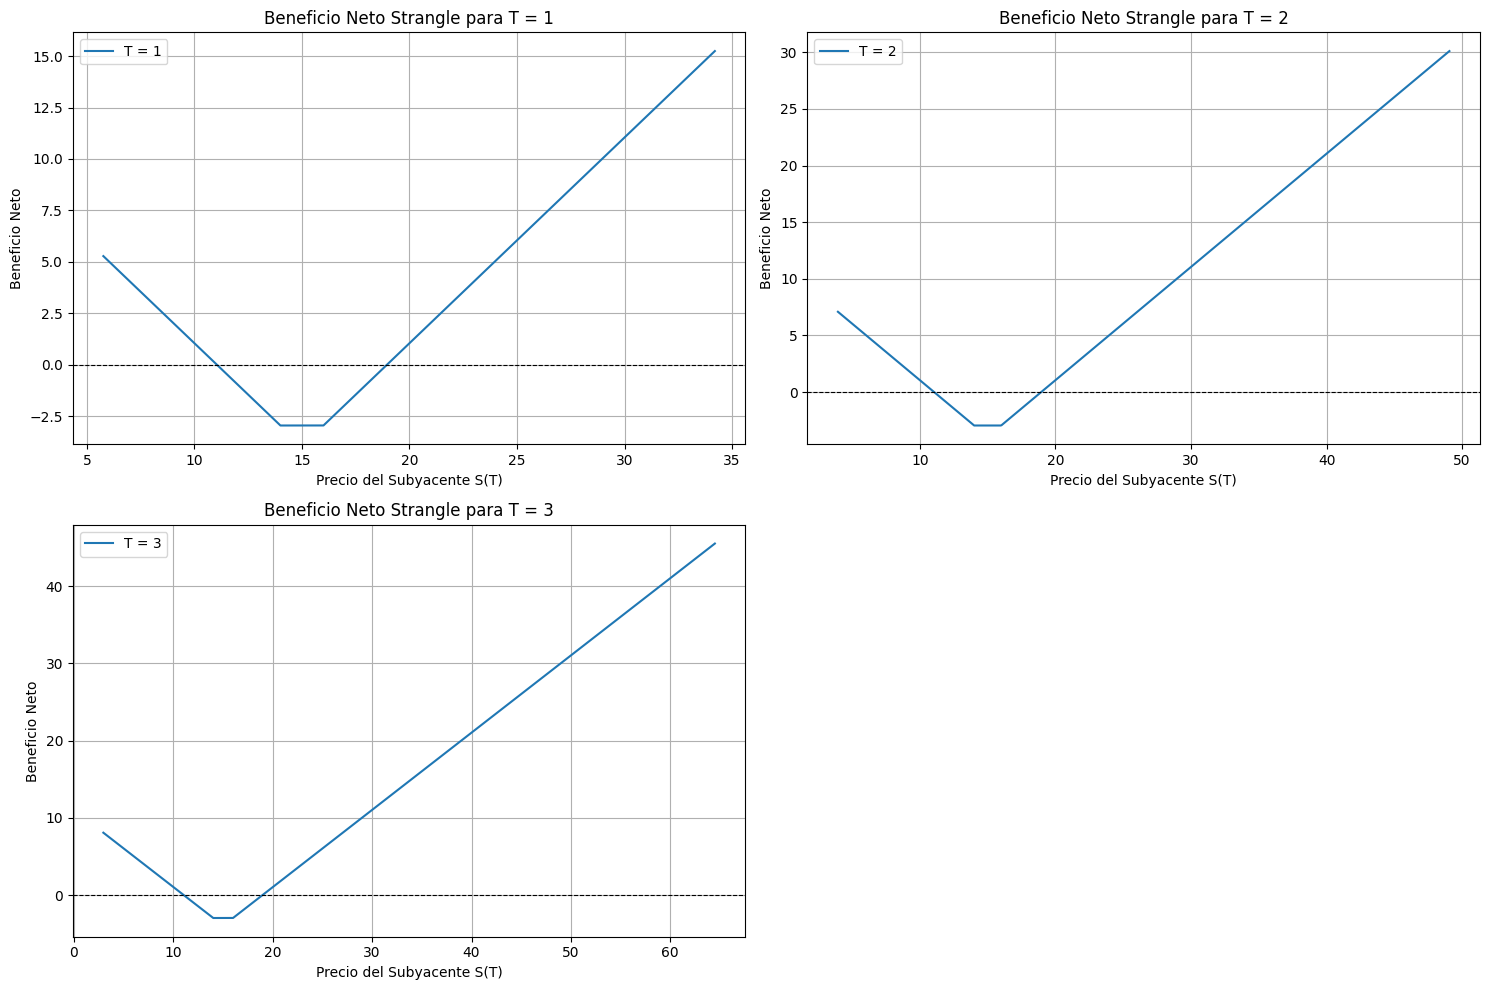

In [ ]:
# Calcular el costo de la estrategia Strangle (costo inicial)
cost_put_K1 = black_scholes_call(S0, K1, r, sigma, d, 1)  # Put con strike K1
cost_call_K3 = black_scholes_call(S0, K3, r, sigma, d, 1)  # Call con strike K3
costo_estrategia_strangle = cost_put_K1 + cost_call_K3  # Costo total de la estrategia

# Generar gráficos para cada T
plt.figure(figsize=(15, 10))
x0=123456789

for i, T in enumerate(T_values, 1):
    # Generar valores normales con Box-Muller
    Z = []
    seed_local = x0  # Usar una semilla inicial para cada T
    for _ in range(N):
        z1, z2, seed_local = BoxMuller(seed_local)
        Z.append(z2)  # Usar solo los valores generados por seno (z2)

    Z = np.array(Z)

    # Simular precios finales del subyacente S(T)
    ST = S0 * np.exp((rc - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcular los payoffs de la estrategia Strangle
    payoff_put = np.maximum(K1 - ST, 0)  # Payoff de la Put
    payoff_call = np.maximum(ST - K3, 0)  # Payoff de la Call
    payoffs_strangle = payoff_put + payoff_call  # Suma de los payoffs

    # Calcular el beneficio neto restando el costo de la estrategia
    beneficio_neto = payoffs_strangle - costo_estrategia_strangle

    # Ordenar valores para una gráfica suave
    indices_ordenados = np.argsort(ST)
    ST_ordenado = ST[indices_ordenados]
    beneficio_neto_ordenado = beneficio_neto[indices_ordenados]

    # Crear un subplot para este T
    plt.subplot(2, 2, i)
    plt.plot(ST_ordenado, beneficio_neto_ordenado, label=f"T = {T}")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Línea en y=0
    plt.title(f"Beneficio Neto Strangle para T = {T}")
    plt.xlabel("Precio del Subyacente S(T)")
    plt.ylabel("Beneficio Neto")
    plt.legend()
    plt.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()